Accuracy of the model: 62.36 %

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.63      0.67    217500
     Neutral       0.09      0.13      0.11     45000
    Positive       0.69      0.72      0.70    217500

    accuracy                           0.62    480000
   macro avg       0.50      0.49      0.50    480000
weighted avg       0.65      0.62      0.63    480000



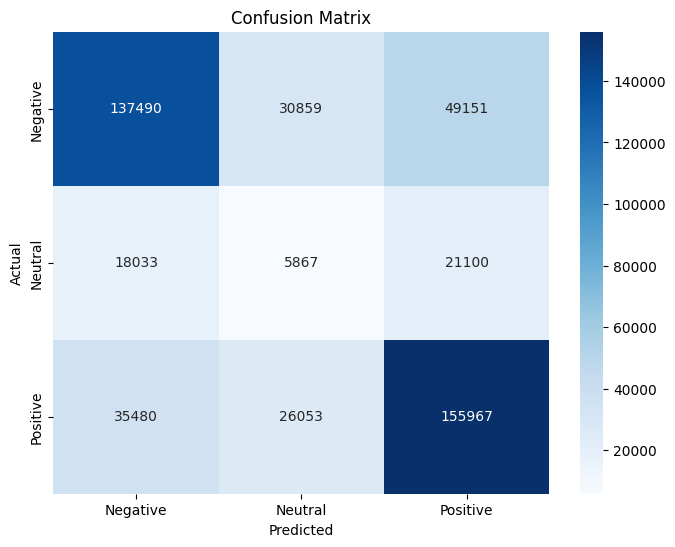

              precision    recall  f1-score   support

    Negative       0.72      0.63      0.67    217500
     Neutral       0.09      0.13      0.11     45000
    Positive       0.69      0.72      0.70    217500

    accuracy                           0.62    480000
   macro avg       0.50      0.49      0.50    480000
weighted avg       0.65      0.62      0.63    480000

 write ups

Logistic Regression is the  model that i used over here because it is fast and used a classifier and overall useful of filtering the tones later on,

TF-IDF (Term Frequency – Inverse Document Frequency
Keeps a note of rare yet important words, the stopwords are all removed thereby the discriminative words for classifying the sentiment gets better.

Challenges Faced
The dataset initially lacked neutral tweets.had to create a sample collection
Cleaning tweets required careful regex patterns to remove URLs, mentions, and special characters.faced some problem in removing these
other than these rest all w

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load only the columns we need
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='latin-1', usecols=[0, 5],names=['target', 'text'])

# Create a sample of neutral tweets by taking from positive and negative
neutral_sample_size = 150000
positive_sample = df[df['target'] == 4].sample(n=neutral_sample_size // 2, random_state=42)
negative_sample = df[df['target'] == 0].sample(n=neutral_sample_size // 2, random_state=42)
neutral_df = pd.concat([positive_sample, negative_sample])
neutral_df['target'] = 2
# Add the neutral data back to the original dataframe
df.loc[neutral_df.index, 'target'] = 2
# Mapping the sentiment values to labels
sentiment_map = {0: 'negative', 2: 'neutral', 4: 'positive'}
df['sentiment'] = df['target'].map(sentiment_map)
df.drop('target', axis=1, inplace=True)
df.head()

#TASK 2
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    tweet = re.sub(r"@\w+", '', tweet)
    tweet = re.sub(r"#", '', tweet)
    tweet = re.sub(r"[^\w\s]", '', tweet)
    tweet = re.sub(r"\d+", '', tweet)
    tweet = re.sub(r"\s+", ' ', tweet).strip()
    return tweet

# Applying to the dataset
df['clean_text'] = df['text'].apply(clean_tweet)
df[['clean_text', 'sentiment']].head()
# Mapping string labels to numeric
numeric_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['label'] = df['sentiment'].map(numeric_map)
df[['clean_text', 'sentiment', 'label']].head()
df['sentiment'].value_counts()

#TASK 3
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf.fit_transform(df['clean_text'])
X.shape

#TASK 4
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# results
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

#TASK 5
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
labels = ['Negative', 'Neutral', 'Positive']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred, target_names=labels))

print(" write ups")
print("\nLogistic Regression is the  model that i used over here because it is fast and used a classifier and overall useful of filtering the tones later on,")

print("\nTF-IDF (Term Frequency – Inverse Document Frequency")
print("Keeps a note of rare yet important words, the stopwords are all removed thereby the discriminative words for classifying the sentiment gets better.")
print("\nChallenges Faced")
print("The dataset initially lacked neutral tweets.had to create a sample collection")
print("Cleaning tweets required careful regex patterns to remove URLs, mentions, and special characters.faced some problem in removing these")
print("other than these rest all was doable")